Task 1: Load the classification dataset.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

dataset = pd.read_csv("/content/house_price_data.txt", delimiter=',')


Task 2: Plot the class features and color them according to your class label.

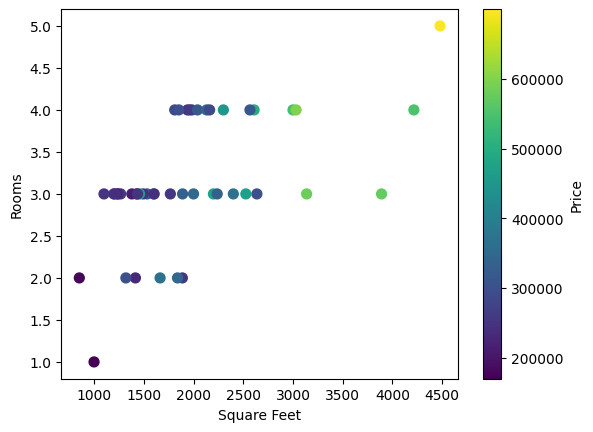

In [ ]:

X = dataset.iloc[:, 0]
Y = dataset.iloc[:, 1]

class_label = dataset.iloc[:, 2]

plt.scatter(X, Y, c=class_label, marker='o', s=50)

plt.xlabel('Square Feet')
plt.ylabel('Rooms')
plt.colorbar(label='Price')

plt.show()


Task 3: Display the statistical information per class of the feature matrix like mean, median, standard deviation and variance.

In [ ]:
stats = dataset.describe()

print("Stats per Class:")
print(stats)

Stats per Class:
              2104          3         399900
count    46.000000  46.000000      46.000000
mean   1998.434783   3.173913  339119.456522
std     803.333019   0.768963  126103.418369
min     852.000000   1.000000  169900.000000
25%    1429.500000   3.000000  249900.000000
50%    1870.000000   3.000000  299900.000000
75%    2284.500000   4.000000  368875.000000
max    4478.000000   5.000000  699900.000000


Task 04: Prepare the dataset by normalizing or scaling the feature set. [Hint: Normalization range 0 to 1]

Note: Normalization is necessary for scaling a dataset which has largely varying data in order to reduce the time required for training.

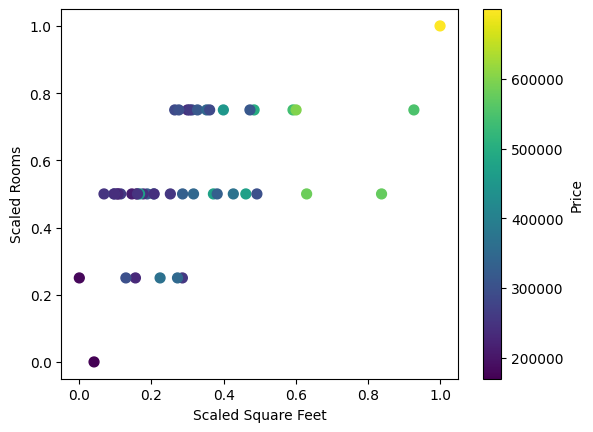

In [ ]:

scaler = MinMaxScaler()

X = X.values.reshape(-1, 1)
Y = Y.values.reshape(-1, 1)

X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y)

plt.scatter(X_scaled, Y_scaled, c=class_label, marker='o', s=50)

plt.xlabel('Scaled Square Feet')
plt.ylabel('Scaled Rooms')
plt.colorbar(label='Price')

plt.show()


Task 5: Prepare the training and testing dataset. Split them into a 80-20% ratio size.

In [ ]:
Features = dataset.iloc[:, 0:2]  # Features (First two columns)
Label = dataset.iloc[:, 2]    # Label variable (third column)

Features_train, Features_test, Label_train, Label_test = train_test_split(Features, Label, test_size=0.2)

print("Training set size:", len(Features_train))
print("Testing set size:", len(Features_test))

# Sort the training and testing dataframes by their index
Features_train = Features_train.sort_index()
Label_train = Label_train.sort_index()
Features_test = Features_test.sort_index()
Label_test = Label_test.sort_index()

# Create DataFrames for training and testing sets
training_set = pd.concat([Features_train, Label_train], axis=1)
testing_set = pd.concat([Features_test, Label_test], axis=1)

# Rename the columns for clarity
training_set.columns = ['Square Feet', 'Rooms', 'Price']
testing_set.columns = ['Square Feet', 'Rooms', 'Price']

# Print the training and testing sets separately
print("Training Set:\n", training_set)
print("\nTesting Set:\n", testing_set)

Training set size: 36
Testing set size: 10
Training Set:
     Square Feet  Rooms   Price
0          1600      3  329900
3          3000      4  539900
4          1985      4  299900
5          1534      3  314900
6          1427      3  198999
7          1380      3  212000
9          1940      4  239999
10         2000      3  347000
11         1890      3  329999
12         4478      5  699900
14         2300      4  449900
15         1320      2  299900
17         2609      4  499998
18         3031      4  599000
19         1767      3  252900
20         1888      2  255000
21         1604      3  242900
23         3890      3  573900
24         1100      3  249900
25         1458      3  464500
26         2526      3  469000
27         2200      3  475000
29         1839      2  349900
30         1000      1  169900
31         2040      4  314900
32         3137      3  579900
33         1811      4  285900
34         1437      3  249900
36         2132      4  345000
37         4

Task 6: Implement the hypothesis function. hθ (x) = θ0 +θ1x1 +θ2x2 +θ3x3 +···+θnxn

In [ ]:
def hypothesis(theta, square_feet, rooms):
  theta0, theta1, theta2 = theta
  predicted_price = theta0 + theta1 * square_feet + theta2 * rooms
  return predicted_price


Task 7: Implement the cost function.

In [ ]:
def mean_absolute_error(true, pred):
    absolute_errors = [abs(true - pred) for true, pred in zip(true, pred)]
    mae = sum(absolute_errors) / len(true)
    return mae

def mean_square_error(y_true, y_pred):
    squared_errors = [(true - pred) ** 2 for true, pred in zip(y_true, y_pred)]
    mse = sum(squared_errors) / len(y_true)
    return mse


Task 08: Implement the gradient descent function. You should return the updated theta values and the value from the cost function at found from each epoch.

In [ ]:
def gradient_descent(X, y, theta, learning_rate, num_epochs):
    m = len(y)
    n = len(theta)

    # Lists to store values for each iteration
    theta_history = []
    mae_history = []
    mse_history = []

    for epoch in range(num_epochs):
        gradient = [0.0] * n

        for i in range(m):
            prediction = 0.0
            for j in range(n):
                prediction += theta[j] * X[i][j]

            error = prediction - y[i]

            for j in range(n):
                gradient[j] += (1 / m) * error * X[i][j]

        for j in range(n):
            theta[j] -= learning_rate * gradient[j]

        # Calculate MAE and MSE for the current theta
        current_predictions = np.dot(X, theta)
        current_mae = mean_absolute_error(y, current_predictions)
        current_mse = mean_square_error(y, current_predictions)

        # Append values to history lists
        theta_history.append(list(theta))
        mae_history.append(current_mae)
        mse_history.append(current_mse)

        # Print values for the current iteration
        # print(f"Iteration {epoch + 1}: Theta = {theta}, MAE = {current_mae}, MSE = {current_mse}")

    return theta, theta_history, mae_history, mse_history


In [ ]:
X = dataset.iloc[:, 0:2].values  # Features (First two columns)
y = dataset.iloc[:, 2].values    # Target variable (third column)

initial_theta = np.zeros(2)

learning_rate = 0.01
num_epochs = 10

# Calculating MAE and MSE before running gradient descent
initial_predictions = np.dot(X, initial_theta)
initial_mae = mean_absolute_error(y, initial_predictions)
initial_mse = mean_square_error(y, initial_predictions)

print("Before Gradient Descent:")
print("Initial Mean Absolute Error (MAE) on Training Data:", initial_mae)
print("Initial Mean Square Error (MSE) on Training Data:", initial_mse)
print()

# Performing gradient descent to optimize parameters
optimized_theta, theta_history, mae_history, mse_history = gradient_descent(X, y, initial_theta, learning_rate, num_epochs)

# Calculate predictions using the final optimized theta
optimized_predictions = np.dot(X, optimized_theta)

# Calculate MAE and MSE after running gradient descent
mae = mean_absolute_error(y, optimized_predictions)
mse = mean_square_error(y, optimized_predictions)

print("\nAfter Gradient Descent:")
print("Optimized Mean Absolute Error (MAE) on Training Data:", mae)
print("Optimized Mean Square Error (MSE) on Training Data:", mse)


Before Gradient Descent:
Initial Mean Absolute Error (MAE) on Training Data: 339119.45652173914
Initial Mean Square Error (MSE) on Training Data: 130558380695.80435


After Gradient Descent:
Optimized Mean Absolute Error (MAE) on Training Data: 1.47542159184254e+52
Optimized Mean Square Error (MSE) on Training Data: 2.5209785689162413e+104


# Task 09
Find the best fitted line with the gradient descent function

In [ ]:
# Define the cost function (MSE in this case)
def cost_function(X, y, theta):
    m = len(y)
    predictions = np.dot(X, theta)
    mse = ((predictions - y) ** 2).sum() / (2 * m)
    return mse

# Initialize parameters
initial_theta = np.zeros(2)

# Set the number of epochs
num_epochs = 50

# Call gradient descent to optimize parameters
theta, theta_history, mae_history, mse_history = gradient_descent(X, y, initial_theta, learning_rate, num_epochs)

# Calculate the cost after gradient descent
J = cost_function(X, y, theta)

print("Cost:", J)
print("Parameters:", theta)


Cost: inf
Parameters: [-2.96870317e+235 -4.28893291e+232]


<ipython-input-96-66045dc89fbc>:7: RuntimeWarning: overflow encountered in double_scalars
  squared_errors = [(true - pred) ** 2 for true, pred in zip(y_true, y_pred)]
<ipython-input-99-d862e154b005>:5: RuntimeWarning: overflow encountered in square
  mse = ((predictions - y) ** 2).sum() / (2 * m)


# Task 10
Plot the best fitted line using matplotlib

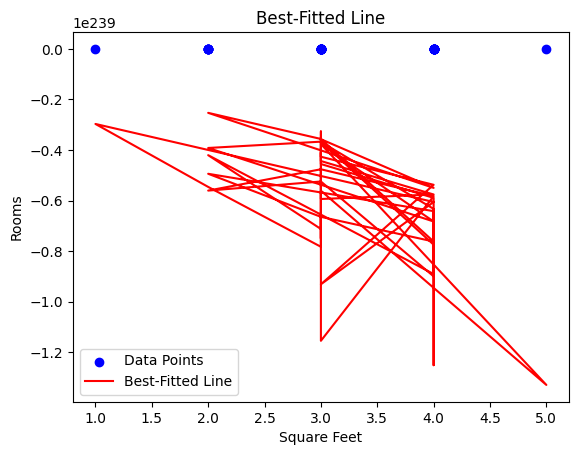

In [ ]:
# Plot the original data points
plt.scatter(X[:, 1], y, marker='o', label='Data Points', c='b')

# Plot the best-fitted line using the optimized theta
plt.plot(X[:, 1], np.dot(X, theta), color='r', label='Best-Fitted Line')

plt.xlabel('Square Feet')
plt.ylabel('Rooms')
plt.title('Best-Fitted Line')
plt.legend()
plt.show()


# Task 11
Plot graph of cost function vs. epoch.

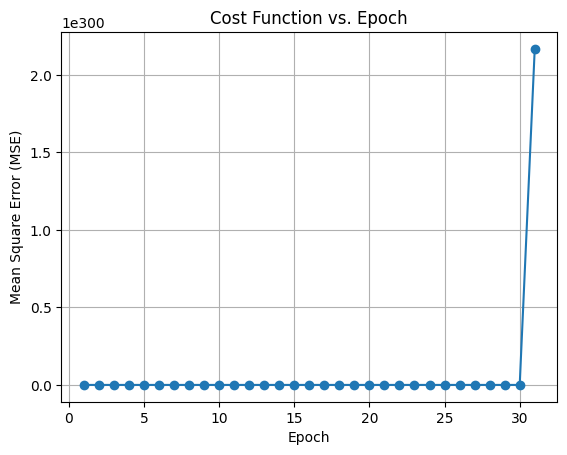

In [ ]:

# Create a list of epoch numbers for the x-axis
epochs = list(range(1, num_epochs + 1))

# Plot the cost function vs. epoch
plt.plot(epochs, mse_history, marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error (MSE)')
plt.title('Cost Function vs. Epoch')
plt.grid(True)
plt.show()


# Task 12
Implement the linear regression model with sklearn library.

Mean Squared Error (MSE): 6954759117.406688
Mean Absolute Error (MAE): 62016.284010096315


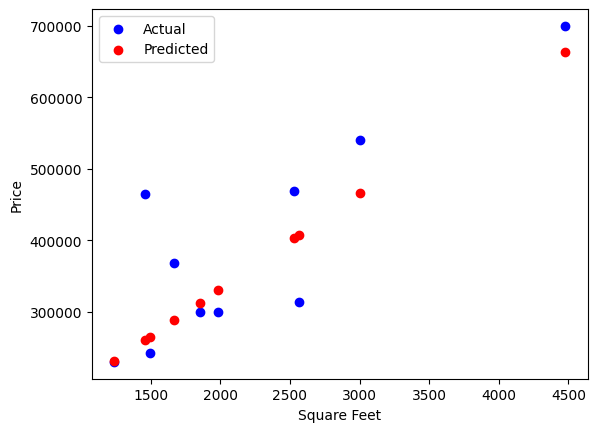

In [ ]:
# Split the dataset into features (X) and target (y)
X = dataset.iloc[:, 0:2]  # Features (First two columns)
y = dataset.iloc[:, 2]    # Target variable (third column)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics (MSE and MAE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

# Plot the best-fitted line
plt.scatter(X_test.iloc[:, 0], y_test, label='Actual', c='b')
plt.scatter(X_test.iloc[:, 0], y_pred, label='Predicted', c='r')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.legend()
plt.show()

# All Together

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


dataset = pd.read_csv("/content/house_price_data.txt", delimiter=',')

X = dataset.iloc[:, 0]
Y = dataset.iloc[:, 1]

class_label = dataset.iloc[:, 2]

plt.scatter(X, Y, c=class_label, marker='o', s=50)

plt.xlabel('Square Feet')
plt.ylabel('Rooms')
plt.colorbar(label='Price')

plt.show()

scaler = MinMaxScaler()

X = X.values.reshape(-1, 1)
Y = Y.values.reshape(-1, 1)

X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y)

plt.scatter(X_scaled, Y_scaled, c=class_label, marker='o', s=50)

plt.xlabel('Scaled Square Feet')
plt.ylabel('Scaled Rooms')
plt.colorbar(label='Price')

plt.show()

Features = dataset.iloc[:, 0:2]  # Features (First two columns)
Label = dataset.iloc[:, 2]    # Label variable (third column)

Features_train, Features_test, Label_train, Label_test = train_test_split(X, Label, test_size=0.2)

print("Training set size:", len(Features_train))
print("Testing set size:", len(Features_test))

def hypothesis(theta, square_feet, rooms):
  theta0, theta1, theta2 = theta
  predicted_price = theta0 + theta1 * square_feet + theta2 * rooms
  return predicted_price

def mean_absolute_error(true, pred):
    absolute_errors = [abs(true - pred) for true, pred in zip(true, pred)]
    mae = sum(absolute_errors) / len(true)
    return mae

def mean_square_error(y_true, y_pred):
    squared_errors = [(true - pred) ** 2 for true, pred in zip(y_true, y_pred)]
    mse = sum(squared_errors) / len(y_true)
    return mse

def gradient_descent(X, y, theta, learning_rate, num_epochs):
    m = len(y)
    n = len(theta)

    # Lists to store values for each iteration
    theta_history = []
    mae_history = []
    mse_history = []

    for epoch in range(num_epochs):
        gradient = [0.0] * n

        for i in range(m):
            prediction = 0.0
            for j in range(n):
                prediction += theta[j] * X[i][j]

            error = prediction - y[i]

            for j in range(n):
                gradient[j] += (1 / m) * error * X[i][j]

        for j in range(n):
            theta[j] -= learning_rate * gradient[j]

        # Calculate MAE and MSE for the current theta
        current_predictions = np.dot(X, theta)
        current_mae = mean_absolute_error(y, current_predictions)
        current_mse = mean_square_error(y, current_predictions)

        # Append values to history lists
        theta_history.append(list(theta))
        mae_history.append(current_mae)
        mse_history.append(current_mse)

        # Print values for the current iteration
        # print(f"Iteration {epoch + 1}: Theta = {theta}, MAE = {current_mae}, MSE = {current_mse}")

    return theta, theta_history, mae_history, mse_history


X = dataset.iloc[:, 0:2].values  # Features (First two columns)
y = dataset.iloc[:, 2].values    # Target variable (third column)

initial_theta = np.zeros(2)

learning_rate = 0.1
num_epochs = 10

# Calculating MAE and MSE before running gradient descent
initial_predictions = np.dot(X, initial_theta)
initial_mae = mean_absolute_error(y, initial_predictions)
initial_mse = mean_square_error(y, initial_predictions)

print("Before Gradient Descent:")
print("Initial Mean Absolute Error (MAE) on Training Data:", initial_mae)
print("Initial Mean Square Error (MSE) on Training Data:", initial_mse)
print()

# Performing gradient descent to optimize parameters
optimized_theta, theta_history, mae_history, mse_history = gradient_descent(X, y, initial_theta, learning_rate, num_epochs)

# Calculate predictions using the final optimized theta
optimized_predictions = np.dot(X, optimized_theta)

# Calculate MAE and MSE after running gradient descent
mae = mean_absolute_error(y, optimized_predictions)
mse = mean_square_error(y, optimized_predictions)

print("\nAfter Gradient Descent:")
print("Optimized Mean Absolute Error (MAE) on Training Data:", mae)
print("Optimized Mean Square Error (MSE) on Training Data:", mse)
